In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class Particle:
    def __init__(self, position, velocities):
        self.position = position
        self.velocities = velocities
        self.fitness = 0
        self.best_position = self.position
        self.best_fitness = self.fitness
        self.is_best = True

    # Evaluate fitness of the particle and set best fitness and position(local max)
    def evaluate_fitness(self):
        self.fitness = 0
        for i in range(0,len(self.position)-1):
            self.fitness += 100*(self.position[i+1] - self.position[i])**2 + (self.position[i] - 1)**2
        if self.fitness > self.best_fitness:
            self.best_fitness = self.fitness
            self.best_position = self.position
            self.is_best = True
        else:
            self.is_best = False

In [ ]:
class Swarm:
    def __init__(self, options):
        self.dimension = 0
        self.n_particles = 0
        self.population = []
        self.best_particle = None
        self.options = options
        self.fitness_graph = []
        self.generate_population()

    # Generate initial swarm population
    def generate_population(self):
        self.n_particles = int(input("Enter swarm size: "))
        self.dimension = int(input("Enter dimension: "))
        print(f"\nSwarm Size: {self.n_particles}\nDimension: {self.dimension}")
        self.population = []
        for i in range(self.n_particles): 
            position = np.random.standard_normal(size=self.dimension).tolist()
            velocities = [0] * self.dimension
            self.population.append(Particle(position, velocities))
        self.best_particle = random.choice(self.population)

    # Evaluate Fitness of the swarm and set best pasition of the swarm (global max)
    def evaluate_fitness(self):
        for particle in self.population:
            particle.evaluate_fitness()
            if particle.is_best:
                if particle.fitness > self.best_particle.fitness:
                    self.best_particle = particle
        self.fitness_graph.append(self.best_particle.fitness)
        print(f"\nGlobal Best Particle: {self.best_particle.position}, Fitness: {self.best_particle.fitness}")
    
    # Update velocity and position of the particles in the swarm
    def update_swarm(self):
        global_best_position = self.best_particle.position
        r1 = random.uniform(0, 1)
        r2 = random.uniform(0, 1)
        for particle in self.population:
            for i, velocity in enumerate(particle.velocities):
                cognitive_component = self.options['c1']*r1*(particle.best_position[i]-particle.position[i])
                social_component = self.options['c2']*r2*(global_best_position[i]-particle.position[i])
                velocity = self.options['w']*velocity + cognitive_component + social_component
                particle.position[i] = particle.position[i] + velocity

    def damp_weight(self):
        if self.options['w'] > 0.4:
            self.options['w'] = self.options['w']*self.options['w_damp']
                
    # Check for termination
    def terminate(self):
        if len(self.fitness_graph) > 5:
            if len(set(self.fitness_graph[-5:])) == 1:
                return True
        return False
            
    # Plotting graph to show fitness trend
    def plot_graph(self):
        plt.plot(self.fitness_graph)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Best particle fitness")

In [ ]:
def optimize(max_iter=100):
    options = {'c1': 2, 'c2': 2, 'w':0.9, 'w_damp':0.99}
    swarm = Swarm(options)
    for i in range(max_iter):
        swarm.evaluate_fitness()
        swarm.update_swarm()
        swarm.damp_weight()
        if swarm.terminate():
            break
    print(f"Total Iterations: {i}")
    swarm.plot_graph()

Enter swarm size: 10
Enter dimension: 10

Swarm Size: 10
Dimension: 10

Global Best Particle: [-0.4689677346846727, -2.0861247787309414, -1.2678166286758843, 0.7080044869124383, -2.0183524807127964, -0.6375771757361628, 0.04234322160649065, 1.2753971476126778, -1.2813725630393544, 0.08539951939627903], Fitness: 2726.5108057568896

Global Best Particle: [-1.1853701303048132, -3.3754706177012404, -1.992044387523897, 1.9048577510910278, -4.7249429512650885, -1.0268124984297906, -0.23315320591667632, 2.981101270603554, -3.565112205688266, 0.5283331702390167], Fitness: 15106.581661286187

Global Best Particle: [-1.3067893557762909, -3.59399497508719, -2.114789892120026, 2.1077060347204815, -5.183668551028706, -1.0927819196608441, -0.2798456277378878, 3.270191975440996, -3.9521710713260747, 0.6034036350355853], Fitness: 18244.062977196525

Global Best Particle: [-1.4155608528386205, -3.7897565721914055, -2.224749515406606, 2.2894244685288307, -5.594610640581277, -1.1518795846292533, -0.32167

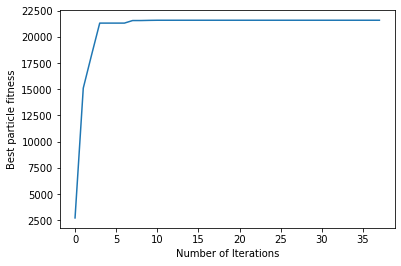

In [ ]:
optimize()